In [4]:
import matplotlib.pyplot as plt
import csv 
import re 
import numpy as np
import pandas as pd

In [30]:
df = pd.read_csv('contigs_info.csv', index_col=0)

In [31]:
df

,Target,Strand,Q-len,Q-start,Q-stop,T-len,T-start,T-stop
Query,,,,,,,,
tig00000033,I,+,238733,7983,238631,230218,1678,230217
tig00000010,II,-,787458,355,787130,813184,5889,813080
tig00004927,II,-,18932,2619,18596,813184,800895,813080
tig00004935,III,+,12529,23,12518,316620,68,12091
tig00004936,III,+,310956,1,310828,316620,11,308157
tig00000001,IV,+,1475780,106,1475750,1531933,8,1525466
tig00000015,V,+,565850,466,565415,576874,44,570294
tig00004939,VI,-,13603,10738,13602,270161,12588,15475
tig00004938,VI,-,298309,10724,289499,270161,12588,267047


In [32]:
# This code just convert the chromosome numbering to integer and remove mitochondrial genes.
Latin_to_arabic = {'I': 1, 'II':2, 'III':3, 'IV':4, 'V':5, 'VI':6, 'VII':7, 'VIII':8, 'IX':9, 'X':10,
                  'XI':11, 'XII':12, 'XIII':13, 'XIV':14, 'XV':15, 'XVI':16, 'Mt': 17, 'None': 'None'}

chro = df['Target']
ch = []
for i in chro:
    ch.append(Latin_to_arabic[i])
df['Chromosome'] = ch

In [33]:
df = df[df['Q-start'] != 'na']

In [34]:
df

,Target,Strand,Q-len,Q-start,Q-stop,T-len,T-start,T-stop,Chromosome
Query,,,,,,,,,
tig00000033,I,+,238733,7983,238631,230218,1678,230217,1
tig00000010,II,-,787458,355,787130,813184,5889,813080,2
tig00004927,II,-,18932,2619,18596,813184,800895,813080,2
tig00004935,III,+,12529,23,12518,316620,68,12091,3
tig00004936,III,+,310956,1,310828,316620,11,308157,3
tig00000001,IV,+,1475780,106,1475750,1531933,8,1525466,4
tig00000015,V,+,565850,466,565415,576874,44,570294,5
tig00004939,VI,-,13603,10738,13602,270161,12588,15475,6
tig00004938,VI,-,298309,10724,289499,270161,12588,267047,6


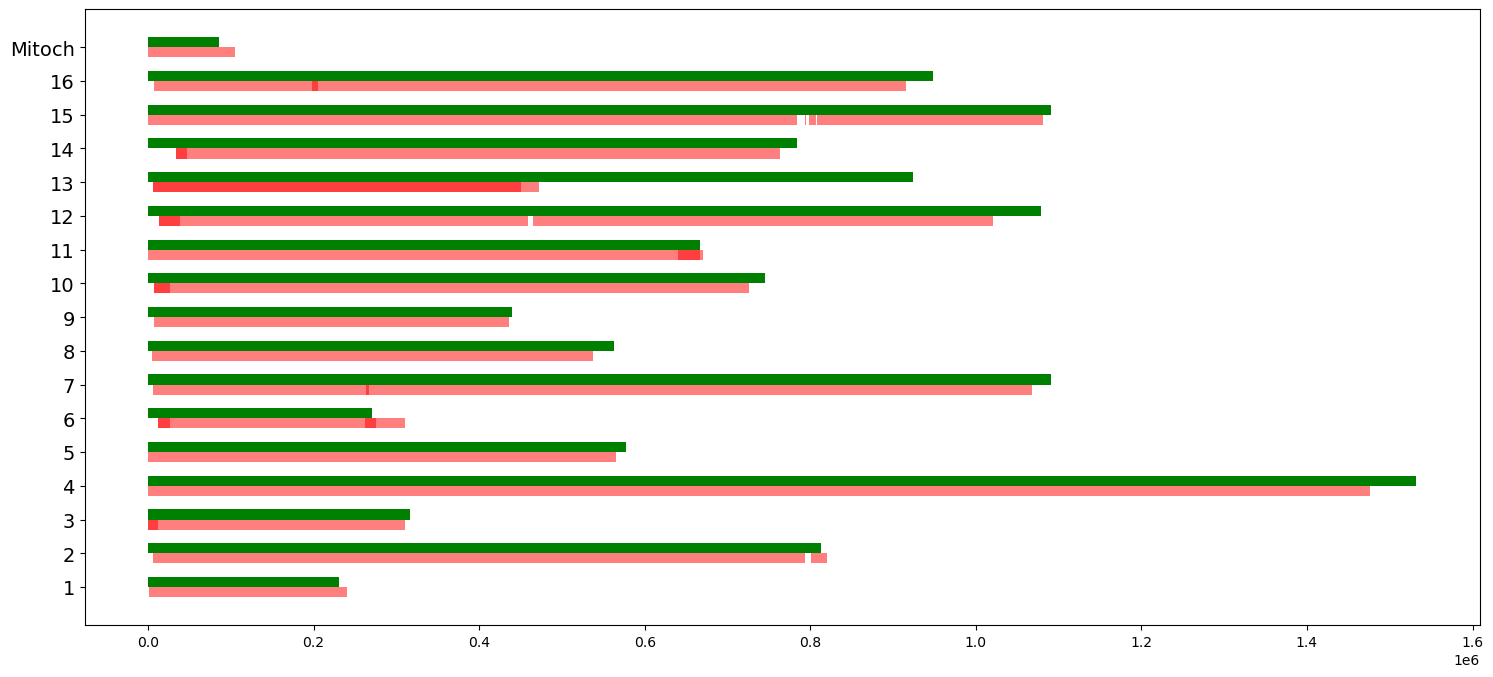

In [49]:
fig, ax = plt.subplots(figsize=(18, 8))
chromosome = 0
for index, row in df.iterrows():
    if chromosome != row['Chromosome']:         
        chromosome = row['Chromosome']
        ax.broken_barh([(0, int(row['T-len']))], (chromosome*10, 3), facecolors='green')
        ax.broken_barh([(int(row['T-start']), int(row['Q-len']))], (chromosome*10-3, 3), facecolors='red', alpha = 0.5)
    else:
        ax.broken_barh([(int(row['T-start']), int(row['Q-len']))], (chromosome*10-3, 3), facecolors='red', alpha = 0.5)

ax.set_yticks([i for i in range(10, 180, 10)])
label = list(set(df['Chromosome']))
label[-1]= 'Mitoch'
ax.set_yticklabels(label, fontsize = 14)
plt.show()

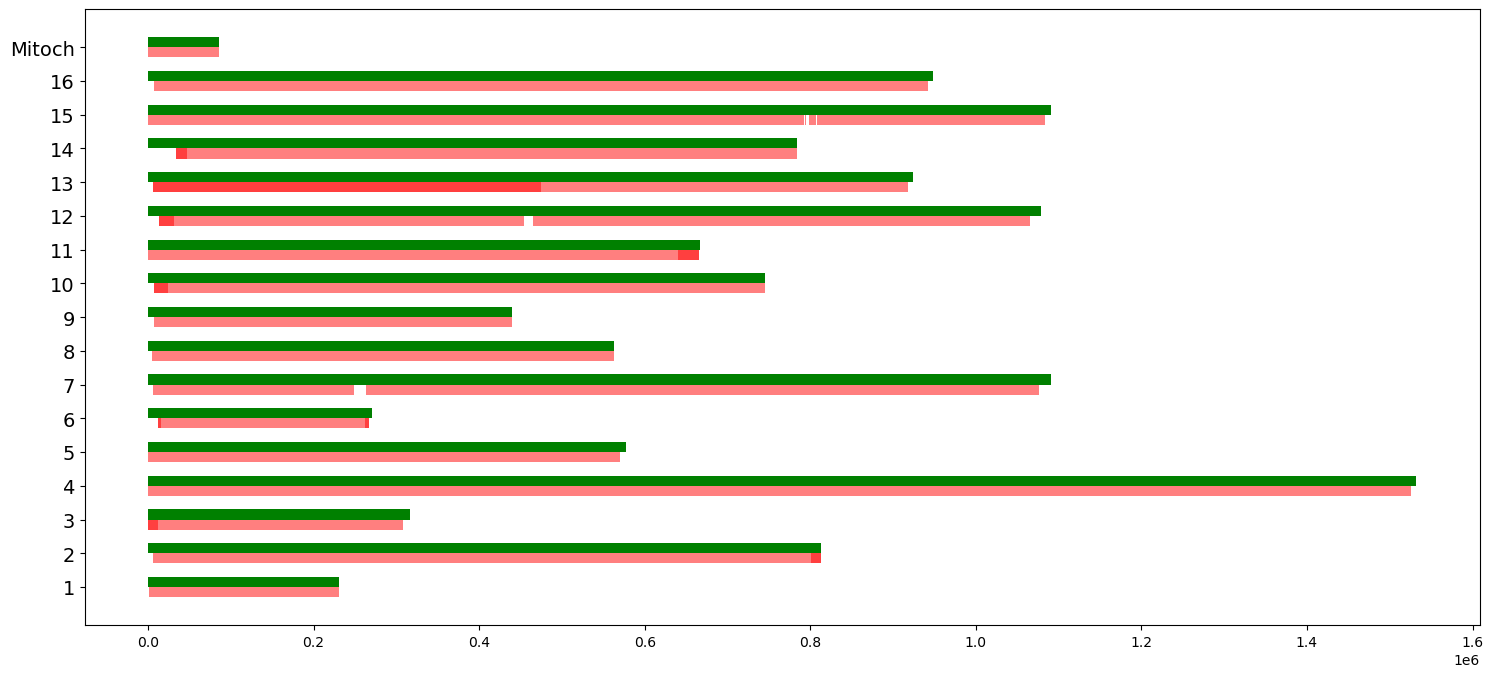

In [52]:
fig, ax = plt.subplots(figsize=(18, 8))
chromosome = 0
for index, row in df.iterrows():
    if chromosome != row['Chromosome']:         
        chromosome = row['Chromosome']
        ax.broken_barh([(0, int(row['T-len']))], (chromosome*10, 3), facecolors='green')
        ax.broken_barh([(int(row['T-start']), int(row['T-stop']) - int(row['T-start']))], (chromosome*10-3, 3), facecolors='red', alpha = 0.5)
    else:
        ax.broken_barh([(int(row['T-start']), int(row['T-stop']) - int(row['T-start']))], (chromosome*10-3, 3), facecolors='red', alpha = 0.5)

ax.set_yticks([i for i in range(10, 180, 10)])
label = list(set(df['Chromosome']))
label[-1]= 'Mitoch'
ax.set_yticklabels(label, fontsize = 14)
plt.show()